<a href="https://colab.research.google.com/github/SahanaSg1729/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction using Machine Learning Approach**
Heart Disease (including Coronary Heart Disease, Hypertension, and Stroke) remains the No. 1 cause of death in the US.The Heart Disease and Stroke Statistics—2019 Update from the American Heart Association indicates that:
*  116.4 million, or 46% of US adults are estimated to have hypertension. These are findings related to the new 2017 Hypertension Clinical Practice Guidelines. 
*  On average, someone dies of CVD every 38 seconds. About 2,303 deaths from CVD each day, based on 2016 data. 
*  On average, someone dies of a stroke every 3.70 minutes. About 389.4 deaths from stroke each day, based on 2016 data. 


In this machine learning project, we have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and we will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.





**Problem Statement**


*   Complete analysis of Heart Disease UCI dataset.
*   To predict whether a person has a heart disease or not based on the various biological and physical parameters.








**Machine Learning Algorithms**


*   K-Nearest Neighbors Classifier
*   Random Forest Classifier
*   Decision Tree Classifier 
*   Naive Bayes Classifier





## **Importing Libraries**

 Let's first import all the necessary libraries. We will use` numpy` and `pandas` to start with. For visualization, we will use `pyplot` subpackage of `matplotlib`, use `rcParams` to add styling to the plots and `rainbow` for colors and `seaborn`. For implementing Machine Learning models and processing of data, we will use the `sklearn` library.

In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
import seaborn as sns
%matplotlib inline

For processing the data, we will import a few libraries. To split the available dataset for testing and training, we are using the `train_test_split` method. To scale the features, we are using `StandardScaler`.

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Next, we will import all the Machine Learning algorithms.
*   K-Nearest Neighbors Classifier
*   Random Forest Classifier
*   Decision Tree Classifier
*   Naive Bayes Classifier






In [285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## **Import Dataset**

Now that we have all the libraries we will need, we can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. We will use the pandas `read_csv` method to read the dataset.

In [286]:
dataset = pd.read_csv('dataset.csv')

The dataset is now loaded into the variable `dataset`. We'll just take a glimpse of the data using the `desribe()` and `info()` methods before we actually start processing and visualizing it.

In [287]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of 13 features along with one target value which we wish to find.

In [288]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564.

### **Dataset Description**

This dataset consists of 13 features and a target variable. The detailed description of all the features are as follows:

1. **Age:** Patients Age in years (Numeric)
2.**Sex:** Gender of patient (Male - 1, Female - 0) (Nominal)
3. **Chest Pain Type**: Type of chest pain(Nominal) experienced by patient categorized into
* Value 1: Typical angina
* Value 2: Atypical angina
* Value 3: Non-anginal pain
* Value 4: Asymptomatic
4. **Resting bps:** Level of blood pressure at resting mode in mm/HG (Numerical)
5. **Cholestrol**: Serum cholestrol in mg/dl (Numeric)
6. **Fasting blood sugar:** Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)
7. **Resting ecg:**  Result of electrocardiogram while at rest are represented in 3 distinct values:
* Value 0: Normal
* Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: Maximum heart rate achieved in bpm (Numeric)
9. **Oldpeak:** Exercise induced ST-depression in comparison with the state of rest (Numeric)
10. **ST slope:** ST segment measured in terms of slope during peak exercise
(Nominal)
* Value 1: Upsloping
* Value 2: Flat
* Value 3: Downsloping
11. **ca:** Number of major blood vessels (0-3)(Numeric)
12. **exang:** Exercise induced angina (1 = yes; 0 = no)
13. **thal**: Thalium stress test 
* Value 3: normal
* Value 6: fixed defect
* Value 7: reversibe defect

**Target variable**
14. **Target:** It is the target variable which we have to predict 1 means patient is suffering from heart risk and 0 means patient is normal.(0 = disease; 1 = no disease)

## **Data Visualization**
Now let see various visual representations of the data to understand more about relationship between various feautures.

### **Distribution of Heart disease (target variable)**

It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

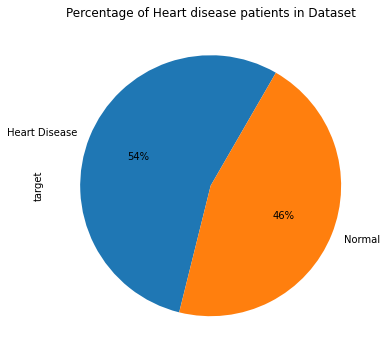

In [289]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(14,6))

ax1 = dataset['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')
plt.show()


The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

Text(0.5, 1.0, 'Count of each Target Class')

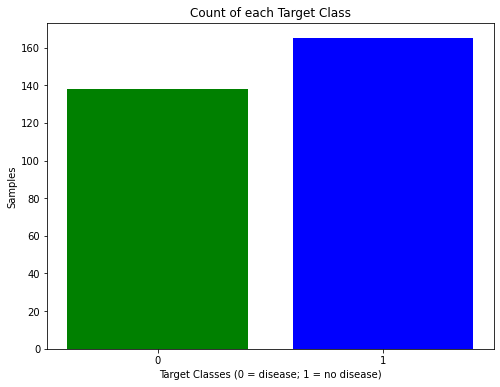

In [290]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['blue', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes (0 = disease; 1 = no disease)')
plt.ylabel('Samples')
plt.title('Count of each Target Class')

Next, We'll take a look at the histograms for each variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0177f0e150>,
      dtype=object)

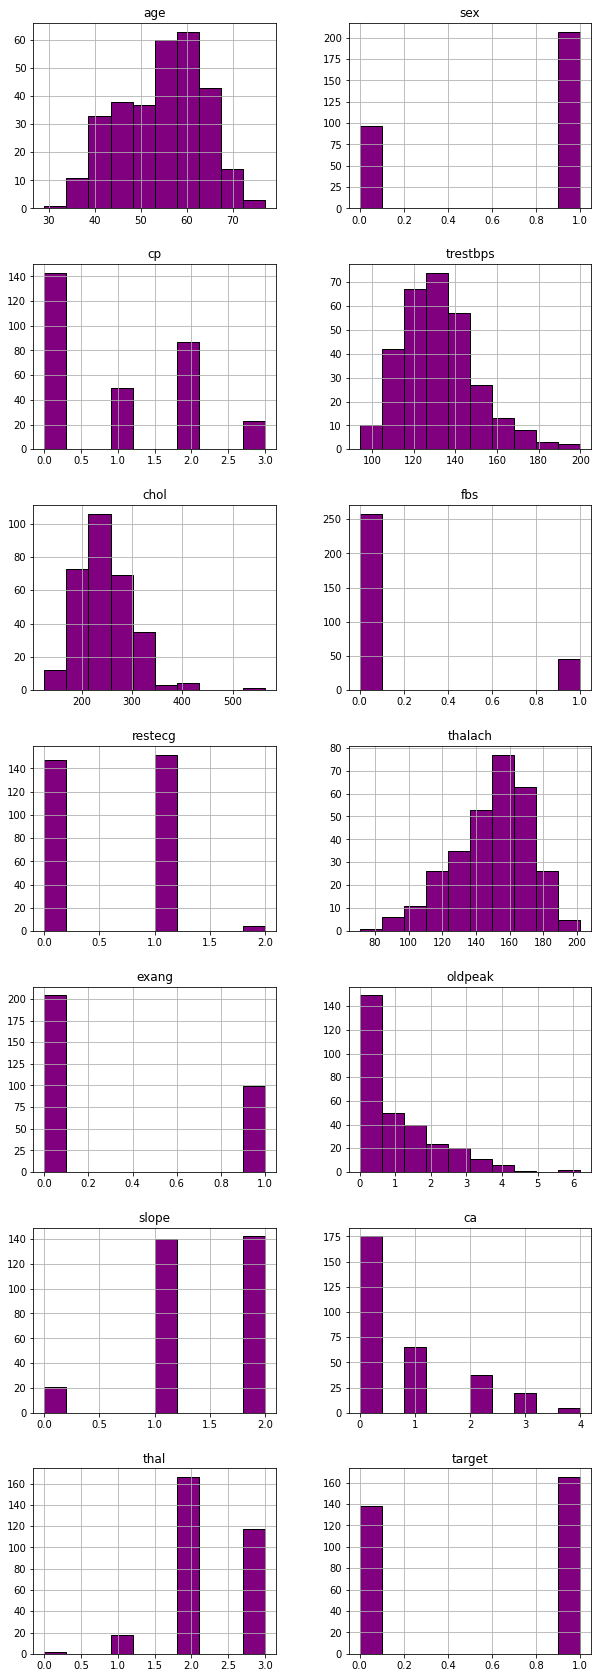

In [291]:
dataset.hist(layout = (7, 2),
            figsize = (10, 30),
            edgecolor='black',
            color=['purple'])

Taking a look at the histograms above, I can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. Also, the categorical features do stand out.

### **Exploratory Data Analysis (EDA)**

In [292]:
categorical_values = []
for column in dataset.columns:
    print('==============================')
    print(f"{column} : {dataset[column].unique()}")
    if len(dataset[column].unique()) <= 10:
        categorical_values.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

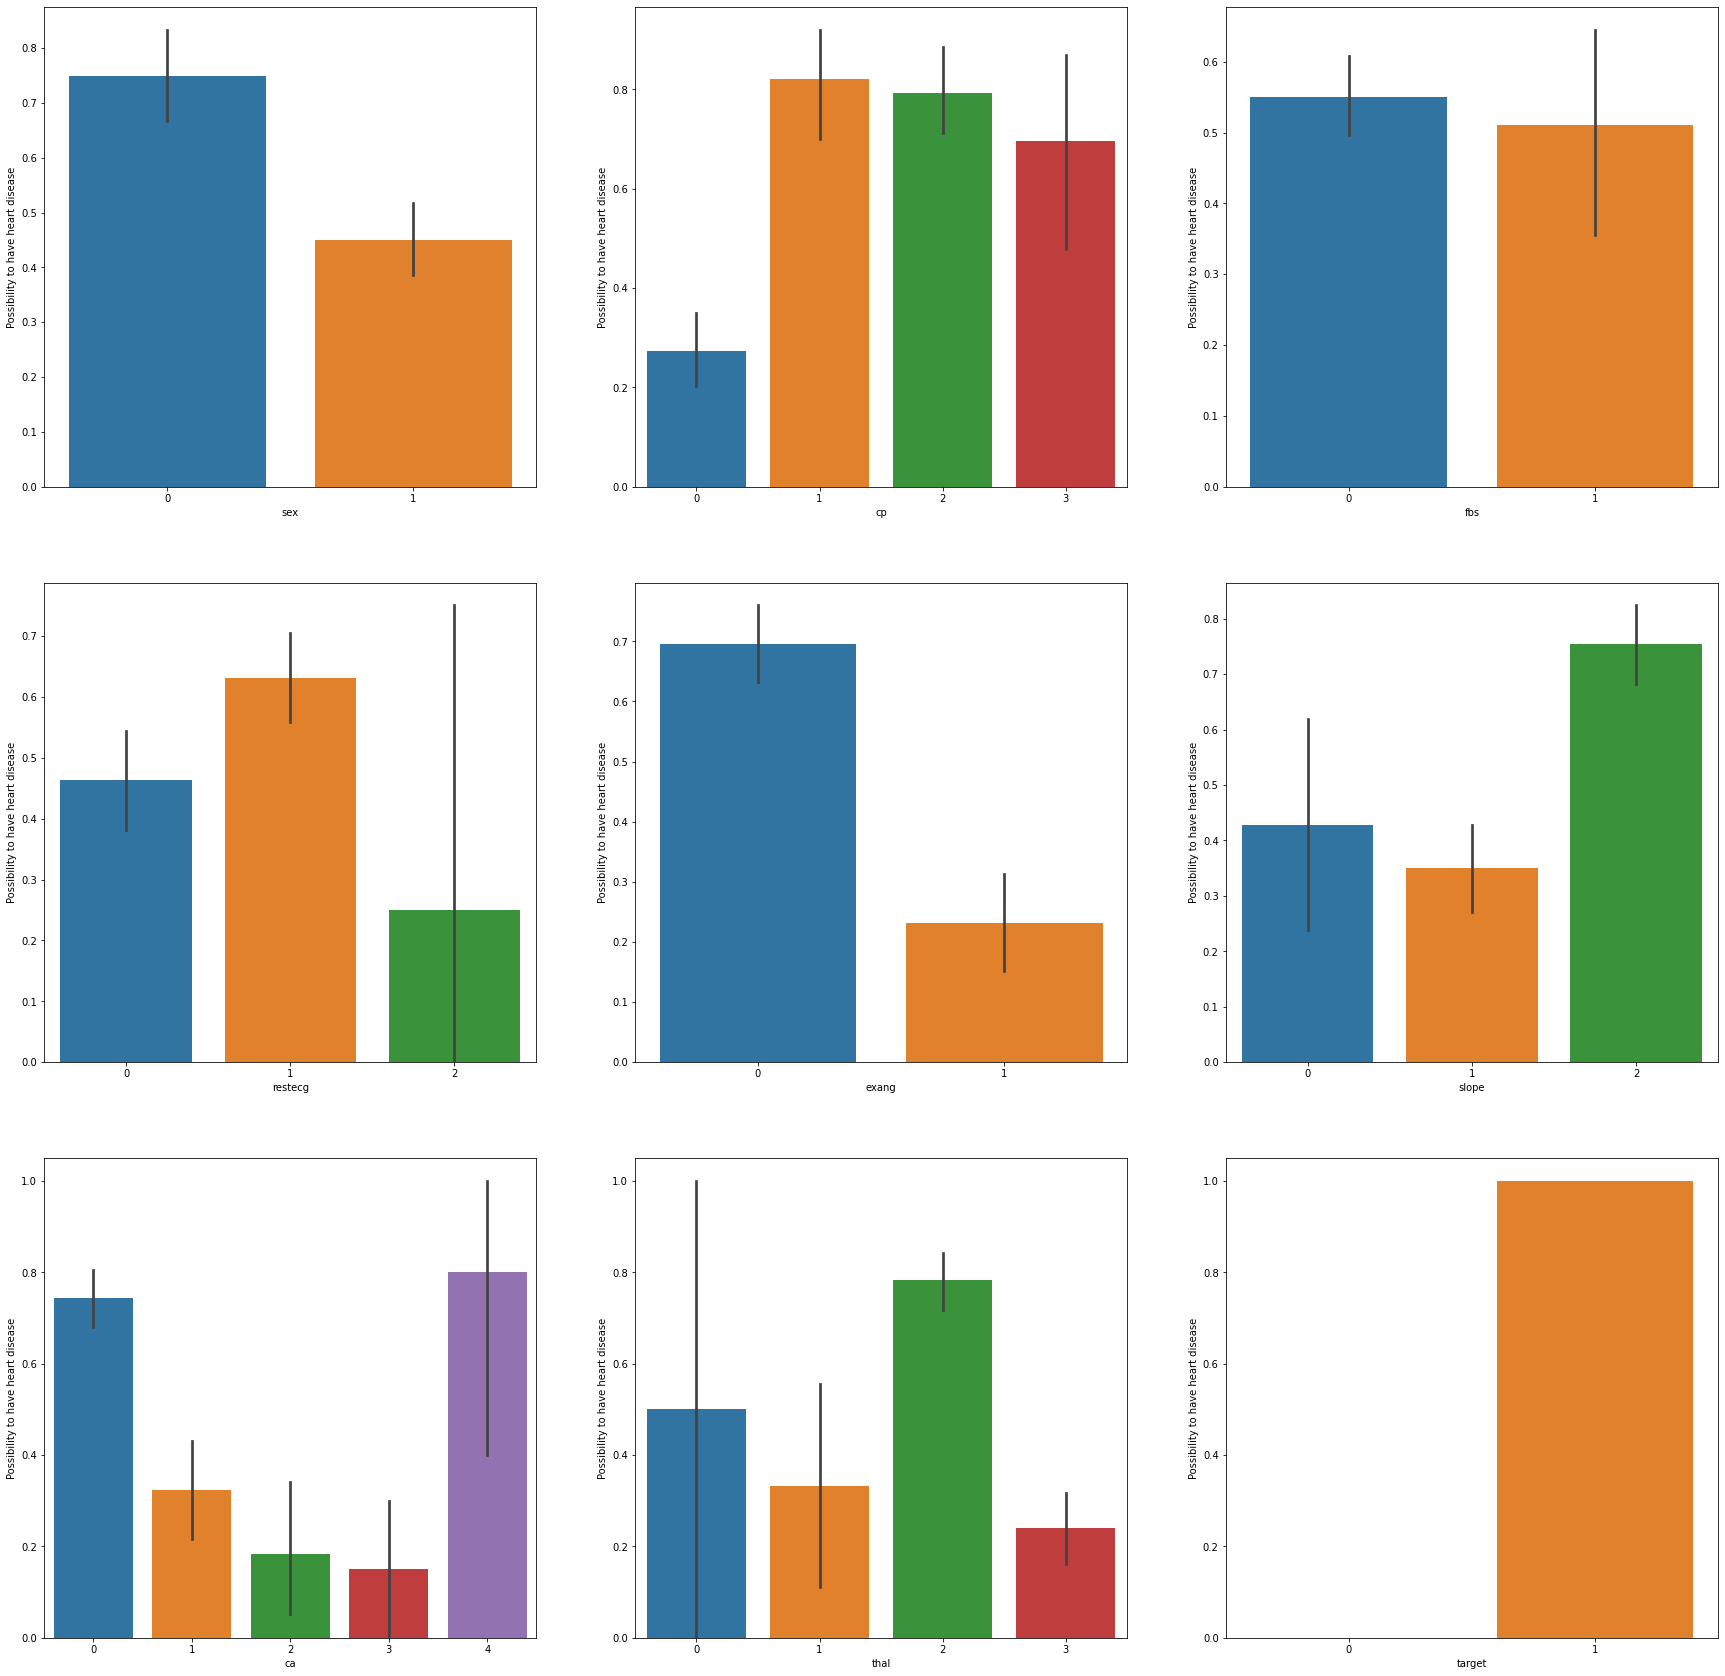

In [293]:
plt.figure(figsize=(30, 30))
for i, column in enumerate(categorical_values, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=f"{column}", y='target', data=dataset)
    plt.ylabel('Possibility to have heart disease')
    plt.xlabel(f'{column}')

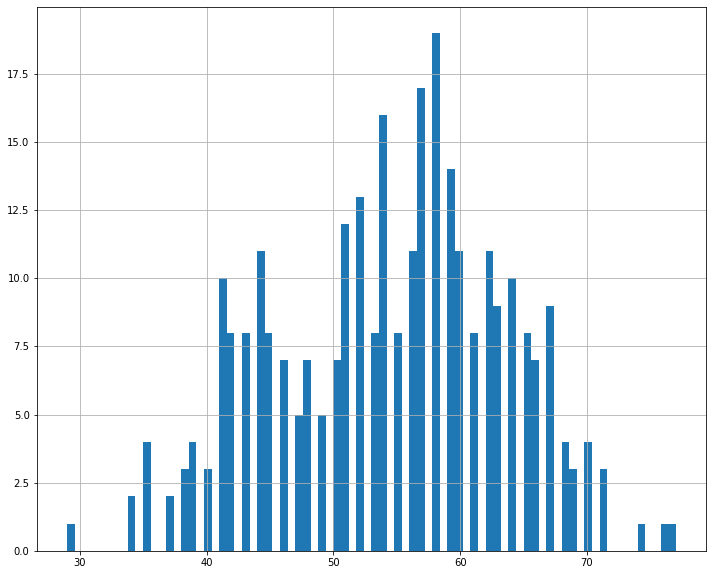

In [294]:
plt.figure(figsize=(12, 10))
dataset.age.hist(bins=80)

In [295]:
print(f"The most of the patients have a mean age of : {dataset.age.mean()}")

The most of the patients have a mean age of : 54.366336633663366


## **Correlation Matrix**

The best way to compare relationship between various features is to look at the correlation matrix between those features.

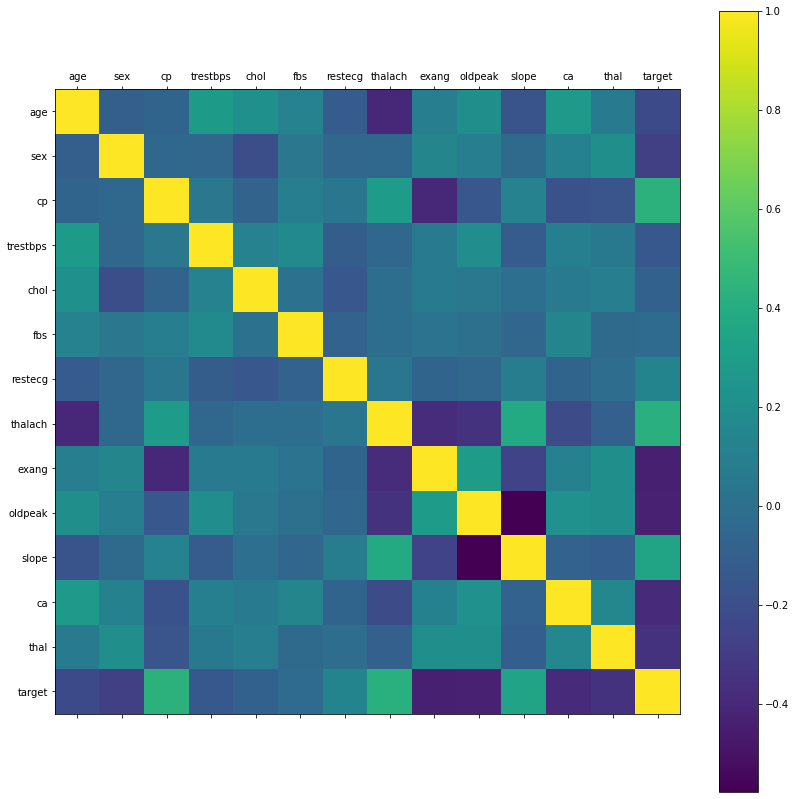

In [296]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

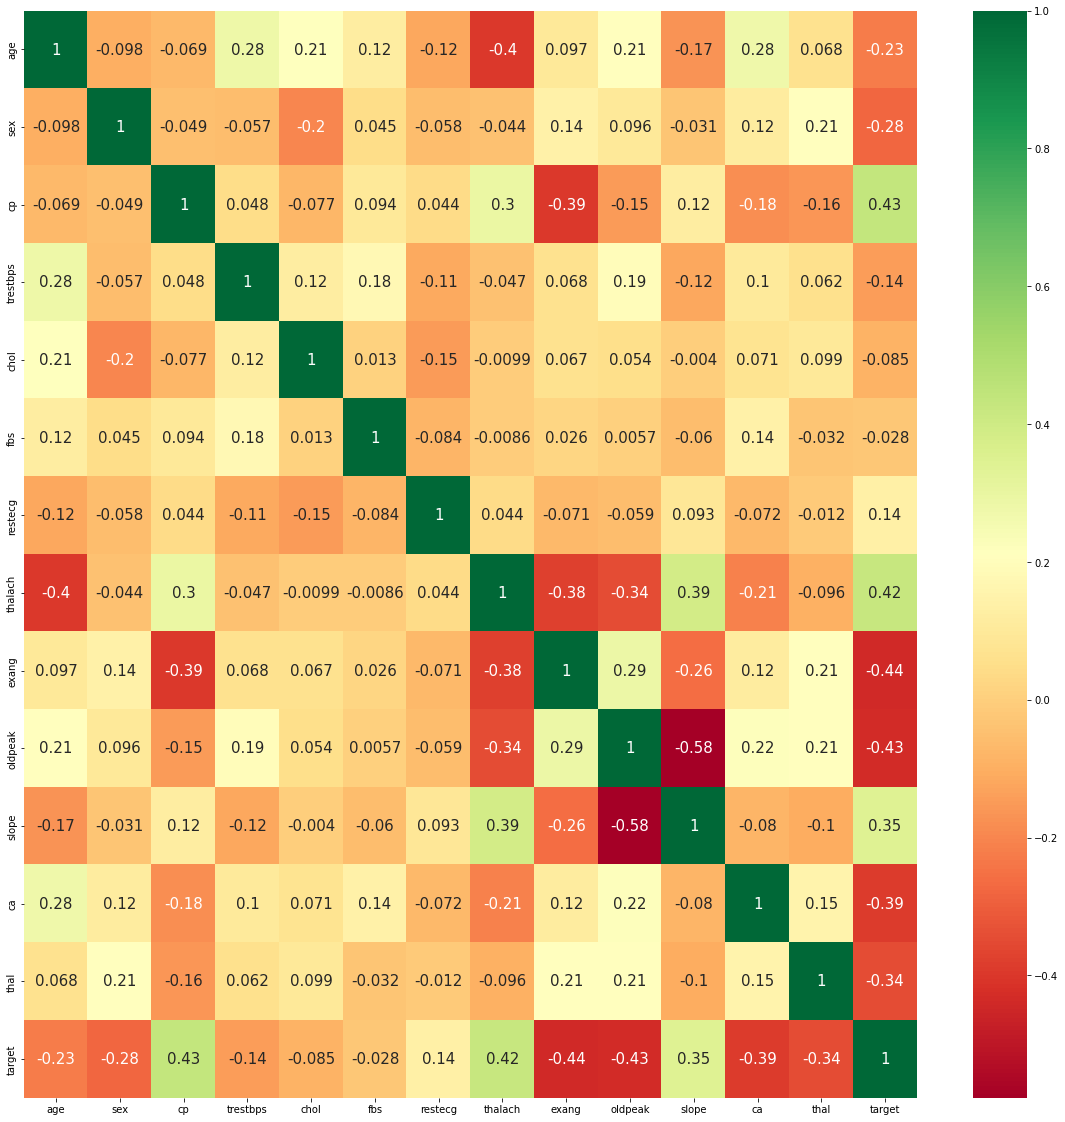

In [297]:
corr_matrix = dataset.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(dataset[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

Taking a look at the correlation matrix above, it's easy to see that a few features have negative correlation with the target value while some have positive.

### **Distribution of Numerical features**

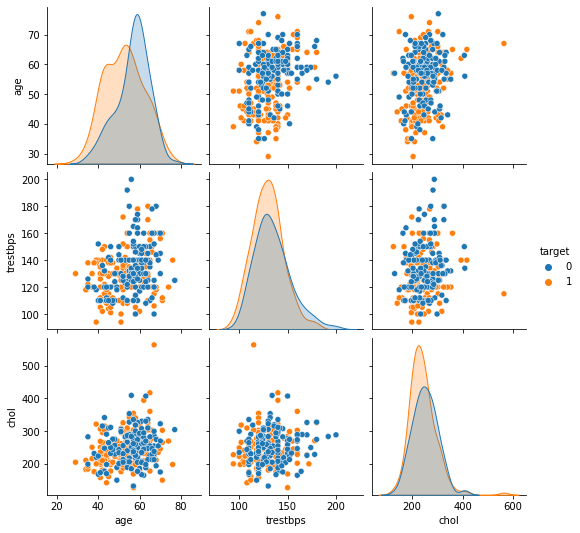

In [298]:
sns.pairplot(dataset, hue = 'target', vars = ['age', 'trestbps', 'chol'] )

From the above plot it is clear that as the age increases chances of heart disease increases

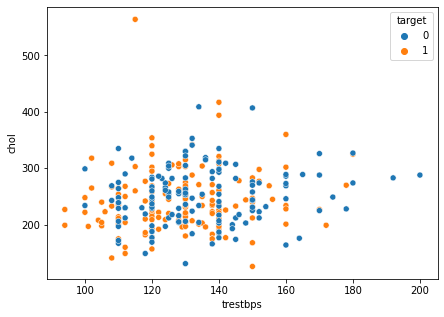

In [299]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x = 'trestbps', y = 'chol', hue = 'target', data = dataset)

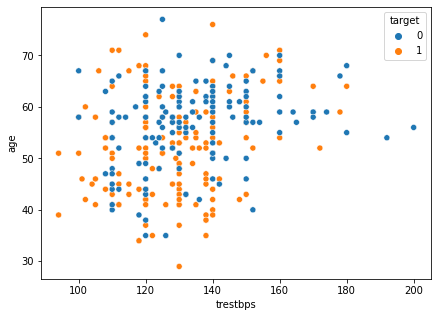

In [300]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x = 'trestbps', y = 'age', hue = 'target', data = dataset)

## **Data Processing**

After exploring the dataset, we observed that we need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, we'll use the `get_dummies` method to create dummy columns for categorical variables.

In [301]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Now, we will use the StandardScaler from sklearn to scale my dataset.

In [302]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

### **Train Test Split**

We'll now import train_test_split to split our dataset into training and testing datasets. Then, we'll import all Machine Learning models we'll be using to train and test the data.

In [303]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

**Checking distribution of traget variable in train test split**

In [304]:
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    113
0     90
Name: target, dtype: int64
Distribution of traget variable in test set
1    52
0    48
Name: target, dtype: int64


## **Machine Learning Models**

### **K Nearest Neighbors Classifier**
The classification score varies based on different values of neighbors that we choose. Thus, we'll plot a score graph for different values of K (neighbors) and check when do we achieve the best score.

In [305]:
print("Training K-Nearest Neighbors Classifier")
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Training K-Nearest Neighbors


We have the scores for different neighbor values in the array `knn_scores`. We'll now plot it and see for which value of K did we get the best scores.

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

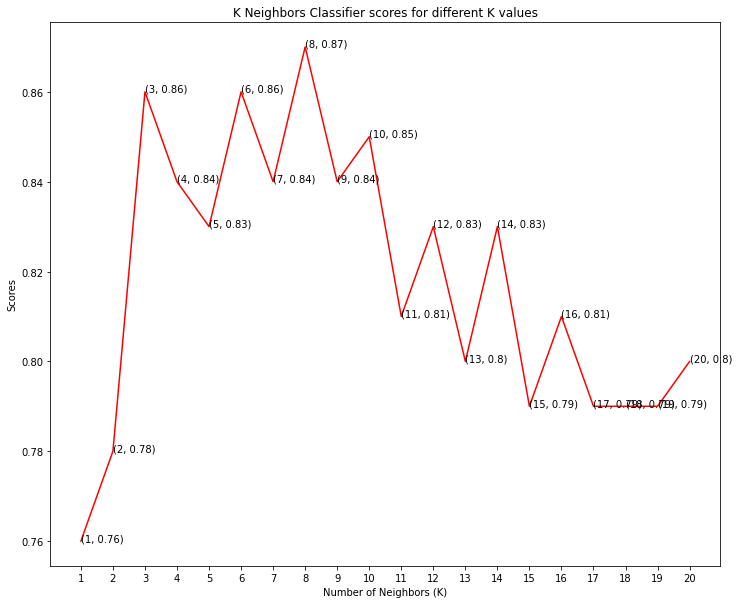

In [306]:
plt.figure(figsize=(12, 10))
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Nearest Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was 0.87 for the 8 neighbors.

In [307]:
print("The score for K Nearest Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 87.0% with 8 nieghbors.


### **Random Forest Classifier**
Now, we'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

In [308]:
print("Training Random Forest Classifier")
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Training Random Forest


The model is trained and the scores are recorded. Let's plot a bar plot to compare the scores.

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

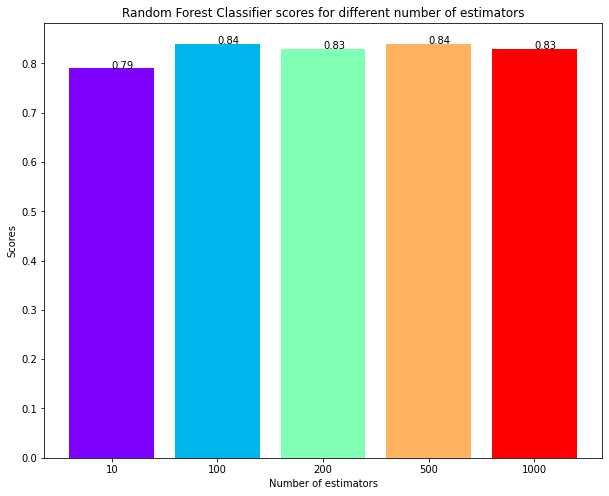

In [309]:
plt.figure(figsize=(10, 8))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimators are 100 or 500.

In [310]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 84.0% with [100, 500] estimators.


### **Decision Tree Classifier**
Here, we'll use the Decision Tree Classifier to model the problem at hand. We'll vary between a set of `max_features` and see which returns the best accuracy.

In [311]:
print('Training Decision Tree Classifier')
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Training Decision Tree


We selected the maximum number of features from 1 to 30 for split. Now, let's see the scores for each of those cases.

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

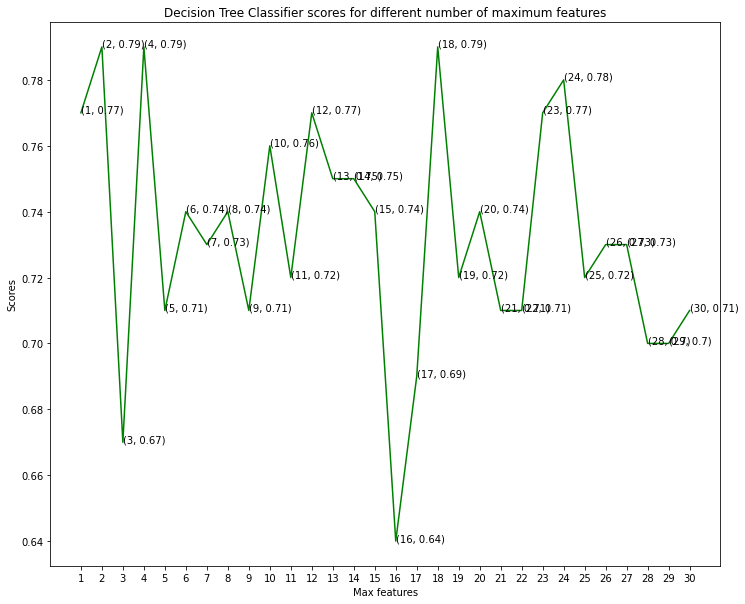

In [312]:
plt.figure(figsize=(12, 10))
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

The model achieved the best accuracy at three values of maximum features, 2, 4 and 18.

In [313]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


### **Naive Bayes Classifier**

Naive Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.

In [314]:
print('Training Naive Bayes Classifier')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = nb_classifier.predict(X_test)
score_nb = round(accuracy_score(y_pred,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes Classifier is: "+str(score_nb)+" %")

Training Naive Bayes
The accuracy score achieved using Naive Bayes is: 85.25 %


## **Conclusion**
In this project, we used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, we analysed it using plots. Then, we generated dummy variables for categorical features and scaled other features. we then applied four Machine Learning algorithms, K Nearest Neighbors Classifier(87.0%), Random Forest Classifier(84.0%) , Decision Tree Classifier(79.0%) and Naive Bayes Classifier(85.25%). We varied parameters across each model to improve their scores. In the end, K Nearest Neighbors Classifier achieved the highest score of 87.0% with 8 nearest neighbors.